## Vegetable Price Prediction

Submitted By: Anish Bhusal (bhusal.anish12@gmail.com)

**Contents**
    
    1. Read Dataset
    2. Data Cleaning and EDA

### Todo: find relationship between avgprice and other parameters.
            - convert pricetype in binary encoding (1,0) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Read Dataset

In [2]:
data=pd.read_csv("Price.csv")
data.head()

,कृषि उपज,ईकाइ,न्यूनतम,अधिकतम,औसत,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,३०,३५,३३,02/25/2018,W
1,गोलभेडा सानो,के.जी.,२५,३०,२८,02/25/2018,W
2,अालु रातो,के.जी.,२०,२३,२२,02/25/2018,W
3,अालु सेतो,के.जी.,१८,२०,१९,02/25/2018,W
4,प्याज सुकेको भारतीय,के.जी.,४४,४६,४५,02/25/2018,W


In [3]:
data.columns

Index(['कृषि उपज', 'ईकाइ', 'न्यूनतम', 'अधिकतम', 'औसत', 'cdate', 'pricetype'], dtype='object')

There are 7 columns in this dataframe. Now lets perform data cleaning and EDA

### 2. Data Cleaning and EDA

***Data Cleaning***

Lets start by renaming the columns for easier use along the way.

In [4]:
data.rename(columns={'कृषि उपज':'VegProduce','ईकाइ':'Quantity','न्यूनतम':'MinPrice','अधिकतम':'MaxPrice','औसत':'AvgPrice'},inplace=True)

**Convert Nepali numerical digits into english**

In [5]:
def convert(val):
    result=[]
    for v in val:
        result.append(int(v))
    return result 

data['MinPrice']=convert(data['MinPrice'].tolist())
data['MaxPrice']=convert(data['MaxPrice'].tolist())
data['AvgPrice']=convert(data['AvgPrice'].tolist())

In [6]:
data.head()

,VegProduce,Quantity,MinPrice,MaxPrice,AvgPrice,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,30,35,33,02/25/2018,W
1,गोलभेडा सानो,के.जी.,25,30,28,02/25/2018,W
2,अालु रातो,के.जी.,20,23,22,02/25/2018,W
3,अालु सेतो,के.जी.,18,20,19,02/25/2018,W
4,प्याज सुकेको भारतीय,के.जी.,44,46,45,02/25/2018,W


In [7]:
#check if there are any null values
data.isnull().sum()

VegProduce    0
Quantity      0
MinPrice      0
MaxPrice      0
AvgPrice      0
cdate         0
pricetype     0
dtype: int64

There are missing values or NaN values.

**Parse Dates into YYYY-MM-DD format**

In [8]:
data['cdate']=pd.to_datetime(data['cdate'],format="%m/%d/%Y")
data.head()

,VegProduce,Quantity,MinPrice,MaxPrice,AvgPrice,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,30,35,33,2018-02-25,W
1,गोलभेडा सानो,के.जी.,25,30,28,2018-02-25,W
2,अालु रातो,के.जी.,20,23,22,2018-02-25,W
3,अालु सेतो,के.जी.,18,20,19,2018-02-25,W
4,प्याज सुकेको भारतीय,के.जी.,44,46,45,2018-02-25,W


**Categorize veggies, fruits for better analysis**

In [9]:
##see how many unique values are there
total_rows=data['VegProduce'].count()
total_unique_veggies=len(data['VegProduce'].unique())
print("Total rows={} | Total Unique Veggies={}".format(total_rows,total_unique_veggies))

Total rows=99302 | Total Unique Veggies=120


*what are the unique veggies in the column*

In [10]:
unique_veggies=data['VegProduce'].unique()
unique_veggies

array(['गोलभेडा ठूलो(नेपाली)', 'गोलभेडा सानो', 'अालु रातो', 'अालु सेतो',
       'प्याज सुकेको भारतीय', 'गाजर(लोकल)', 'बन्दा(लोकल)',
       'काउली स्थानिय', 'काउली तरार्इ', 'मूला रातो', 'मूला सेतो(लोकल)',
       'भन्टा लाम्चो', 'भन्टा डल्लो', 'मटरकोशा', 'घिउ सिमी(लोकल)',
       'टाटे सिमी', 'लौका', 'फर्सी पाकेको', 'फर्सी हरियो(लाम्चो)',
       'भिण्डी', 'बरेला', 'पिंडालू', 'स्कूस', 'रायो साग', 'पालूगो साग',
       'चमसूरको साग', 'तोरीको साग', 'मेथीको साग', 'प्याज हरियो', 'बकूला',
       'तरुल', 'च्याउ(कन्य)', 'ब्रोकाउली', 'चुकुन्दर', 'जिरीको साग',
       'ग्याठ कोबी', 'सेलरी', 'पार्सले', 'सौफको साग', 'पुदीना',
       'गान्टे मूला', 'इमली', 'तामा', 'तोफु', 'गुन्दुक', 'स्याउ(झोले)',
       'केरा', 'कागती', 'अनार', 'अंगुर(हरियो)', 'सुन्तला(नेपाली)',
       'तरबुजा(हरियो)', 'मौसम', 'भुर्इ कटहर', 'काक्रो(लोकल)', 'रुख कटहर',
       'नासपाती(लोकल)', 'मेवा(नेपाली)', 'लप्सी', 'अदुवा',
       'खु्र्सानी सुकेको', 'खु्र्सानी हरियो', 'भेडे खु्र्सानी',
       'लसुन हरियो', 'हरियो धनिया', 'लसुन सुकेको

**Categorize veggies into groups**
1. Fruits
2. Vegetables
3. Meat 

In [11]:
veggies_list=['गोलभेडा ठूलो(नेपाली)', 'गोलभेडा सानो','अालु रातो', 'अालु सेतो','प्याज सुकेको भारतीय', 'गाजर(लोकल)', 'बन्दा(लोकल)',
       'काउली स्थानिय', 'काउली तरार्इ', 'मूला रातो', 'मूला सेतो(लोकल)','भन्टा लाम्चो', 'भन्टा डल्लो', 'मटरकोशा', 'घिउ सिमी(लोकल)',
       'टाटे सिमी', 'लौका', 'फर्सी पाकेको', 'फर्सी हरियो(लाम्चो)','भिण्डी', 'बरेला', 'पिंडालू', 'स्कूस', 'रायो साग', 'पालूगो साग', 'चमसूरको साग', 
        'तोरीको साग', 'मेथीको साग', 'प्याज हरियो', 'बकूला', 'तरुल', 'च्याउ(कन्य)', 'ब्रोकाउली', 'चुकुन्दर', 'जिरीको साग', 'ग्याठ कोबी', 'सेलरी', 
        'पार्सले', 'सौफको साग', 'पुदीना', 'गान्टे मूला', 'इमली', 'तामा', 'तोफु', 'गुन्दुक','अदुवा','खु्र्सानी सुकेको', 'खु्र्सानी हरियो', 'भेडे खु्र्सानी', 
        'लसुन हरियो', 'हरियो धनिया', 'लसुन सुकेको चाइनिज','लसुन सुकेको नेपाली','रातो बन्दा', 'तितो करेला', 'परवर(लोकल)', 'छ्यापी हरियो', 'बोडी(तने)', 
        'सजिवन', 'कोइरालो', 'घिरौला','चिचिण्डो', 'न्यूरो','भटमासकोशा', 'झिगूनी','कुरीलो', 'सखरखण्ड', 'छ्यापी सुकेको', 'गोलभेडा सानो(टनेल)', 
        'आलु रातो(भारतीय)', 'च्याउ(डल्ले)', 'स्याउ(फूजी)', 'काक्रो(हाइब्रीड)', 'खुर्सानी हरियो(बुलेट)', 'खुर्सानी हरियो(माछे)', 'खुर्सानी हरियो(अकबरे)',
        'सेतो मूला(हाइब्रीड)', 'मकै बोडी', 'घिउ सिमी(हाइब्रीड)', 'घिउ सिमी(राजमा)', 'हरियो फर्सी(डल्लो)',  'बन्दा(नरिवल)', 'आलु रातो(मुडे)',
       'ठूलो गोलभेडा(भारतीय)','गोलभेडा सानो(भारतीय)','गाजर(तराई)', 'गोलभेडा सानो(तराई)', 'सुकेको प्याज चाइनिज', 'बन्दा(तराई)', 'स्थानीय काउली(ज्यापु)',
       'परवर(तराई)']
fruits_list=['स्याउ(झोले)', 'केरा', 'कागती', 'अनार', 'अंगुर(हरियो)', 'सुन्तला(नेपाली)','तरबुजा(हरियो)', 'मौसम', 'भुर्इ कटहर', 
             'काक्रो(लोकल)', 'रुख कटहर', 'नासपाती(लोकल)', 'मेवा(नेपाली)', 'लप्सी', 'आँप(मालदह)','लीच्ची(लोकल)', 'अम्बा', 
             'अाँप(दसहरी)', 'तरबुजा(पाटे)', 'मेवा(भारतीय)', 'लीच्ची(भारतीय)','नासपाती(चाइनिज)','सुन्तला(भारतीय)','अंगुर(कालो)']
fish_list=['माछा ताजा','ताजा माछा(रहु)', 'ताजा माछा(बचुवा)','ताजा माछा(छडी)', 'ताजा माछा(म\u200cंुगरी)']

In [12]:
fruits=data[data['VegProduce'].isin(fruits_list)]
veggies=data[data['VegProduce'].isin(veggies_list)]
fish=data[data['VegProduce'].isin(fish_list)]


In [13]:
#group fruits, veggies, fish by date and calculate mean prices
fruitsgp=fruits.groupby('cdate').mean()
veggiesgp=veggies.groupby('cdate').mean()
fishgp=fish.groupby('cdate').mean()

In [14]:
rolling_fruits_avgprice=fruitsgp.AvgPrice.rolling(window=20).mean()
rolling_veggies_avgprice=veggiesgp.AvgPrice.rolling(window=20).mean()
rolling_fish_avgprice=fishgp.AvgPrice.rolling(window=20).mean()

**How has been the distribution of price for fruits, veggies and fish**

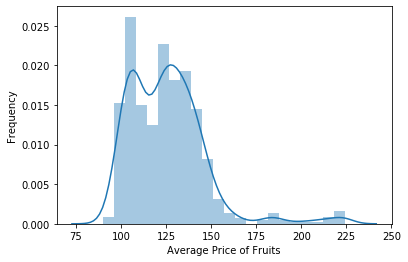

In [15]:
ax=sns.distplot(fruitsgp['AvgPrice'])
ax.set(xlabel='Average Price of Fruits',ylabel='Frequency')
plt.show()

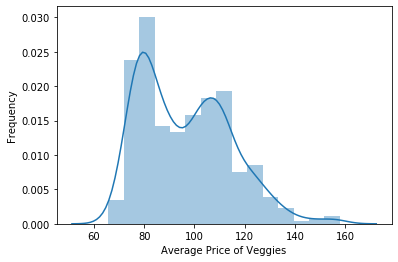

In [16]:
ax=sns.distplot(veggiesgp['AvgPrice'])
ax.set(xlabel='Average Price of Veggies',ylabel='Frequency')
plt.show()

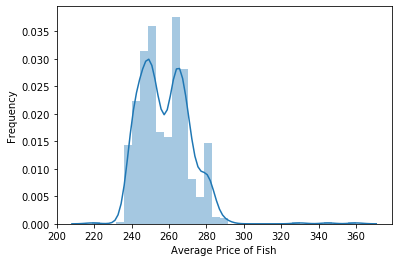

In [17]:
ax=sns.distplot(fishgp['AvgPrice'])
ax.set(xlabel='Average Price of Fish',ylabel='Frequency')
plt.show()

**Now lets visualize the trend of vegetable, fruits and fish prices in overall**

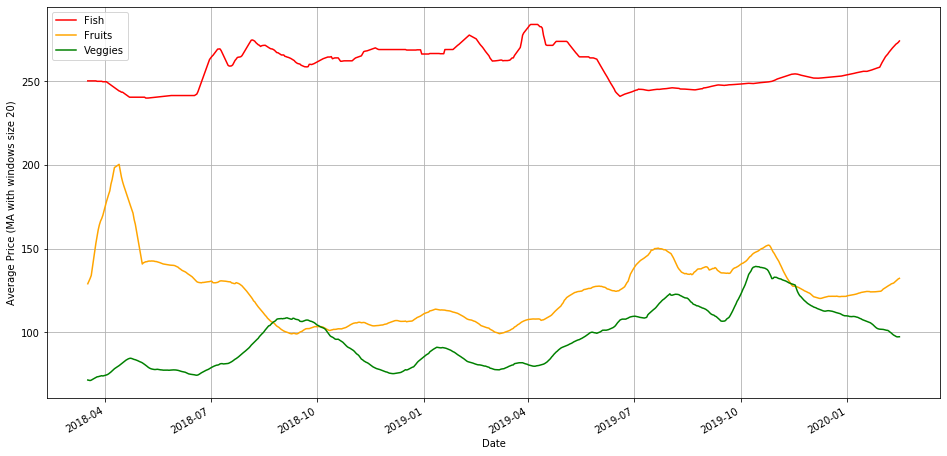

In [18]:
rolling_fish_avgprice.plot.line(color="red",label="Fish")
rolling_fruits_avgprice.plot.line(color="orange",label="Fruits")
rolling_veggies_avgprice.plot.line(color="green",label="Veggies")
plt.gcf().set_size_inches(16,8)
plt.xlabel("Date")
plt.ylabel("Average Price (MA with windows size 20)")
plt.grid()
plt.legend(loc='upper left')
plt.show()


Fish price has remained almost flat while veggies and fruits price seem to be jumping up and down. Recent figures show that fruits prices are rising while veggies are soaring down. 

## Build Feature Set

Our main target is to predict price for tomorrow given that we have price of yesterday. For this we need to create
feature set consisting of :
    
    Veggies | Today's Date | Yesterday's Date | Yesterday's Price | Price for Today | Price Type 

In [19]:
newdata=data.copy()
#sort newdata in ascending order w.r.t. date
newdata.sort_values(by=['cdate'],inplace=True,ascending=False)
newdata.head()

,VegProduce,Quantity,MinPrice,MaxPrice,AvgPrice,cdate,pricetype
99301,ताजा माछा(म‌ंुगरी),के जी,310,320,315,2020-02-15,R
99185,तामा,के.जी.,110,120,115,2020-02-15,W
99193,अंगुर(कालो),केजी,220,230,225,2020-02-15,W
99192,अंगुर(हरियो),के.जी.,120,130,125,2020-02-15,W
99191,अनार,के.जी.,120,130,125,2020-02-15,W


In [20]:
newdata.iloc[68]

VegProduce             मेथीको साग
Quantity                   के.जी.
MinPrice                       30
MaxPrice                       35
AvgPrice                       33
cdate         2020-02-15 00:00:00
pricetype                       W
Name: 99169, dtype: object

In [21]:
##for each vegproduce and price type
# ### 
# for veg_produce in unique_veggies:
#     d=newdata[newdata['VegProduce']==veg_produce]
    
#     #for retail type
#     d_retail_index=d.index[d['pricetype']=="R"].to_list()
#     for rowindex in range(2,len(d_retail_index)):
#         day_1=newdata.iloc[d_retail_index[rowindex-1]]['AvgPrice']
#         day_2=newdata.iloc[d_retail_index[rowindex-2]]['AvgPrice']
#         newdata.loc[d_retail_index[rowindex],'t_2']=day_2
#         newdata.loc[d_retail_index[rowindex],'t_1']=day_1
        
        
# #     #for wholesale type
#     d_wholesale_index=d.index[d['pricetype']=="W"].to_list()
#     for rowindex in range(2,len(d_wholesale_index)):
#         day_1=newdata.iloc[d_wholesale_index[rowindex-1]]['AvgPrice']
#         day_2=newdata.iloc[d_wholesale_index[rowindex-2]]['AvgPrice']
#         newdata.loc[d_wholesale_index[rowindex],'t_2']=day_2
#         newdata.loc[d_wholesale_index[rowindex],'t_1']=day_1
        
    

In [22]:
data.sort_values(by=['cdate'],inplace=True,ascending=False)
data.head()

,VegProduce,Quantity,MinPrice,MaxPrice,AvgPrice,cdate,pricetype
99301,ताजा माछा(म‌ंुगरी),के जी,310,320,315,2020-02-15,R
99185,तामा,के.जी.,110,120,115,2020-02-15,W
99193,अंगुर(कालो),केजी,220,230,225,2020-02-15,W
99192,अंगुर(हरियो),के.जी.,120,130,125,2020-02-15,W
99191,अनार,के.जी.,120,130,125,2020-02-15,W


In [23]:
#shift can be used here 
feature_df=[]
for v in unique_veggies:
    for p_type in ['W','R']:
        df_v=data[(data['VegProduce']==v) & (data['pricetype']==p_type)]
        df_v=df_v.sort_values(by=['cdate'],ascending=False)
        
        if p_type=='W':
            df_v['type']=1
        else:
            df_v['type']=0
            
        df_v['t_1']=df_v.shift(-1)['AvgPrice']
        df_v['t_2']=df_v.shift(-2)['AvgPrice']
        
        feature_df.append(df_v)
        
feature_df=pd.concat(feature_df)

In [24]:
feature_df[feature_df['cdate']=='2018-02-28']

,VegProduce,Quantity,MinPrice,MaxPrice,AvgPrice,cdate,pricetype,type,t_1,t_2
404,गोलभेडा ठूलो(नेपाली),के.जी.,30,35,33,2018-02-28,W,1,38.0,38.0
471,गोलभेडा ठूलो(नेपाली),के.जी.,40,50,45,2018-02-28,R,0,45.0,45.0
405,गोलभेडा सानो,के.जी.,30,35,33,2018-02-28,W,1,33.0,33.0
472,गोलभेडा सानो,के.जी.,40,50,45,2018-02-28,R,0,43.0,45.0
406,अालु रातो,के.जी.,22,24,23,2018-02-28,W,1,24.0,21.0
...,...,...,...,...,...,...,...,...,...,...
536,लसुन सुकेको चाइनिज,के.जी.,220,250,235,2018-02-28,R,0,235.0,235.0
470,माछा ताजा,के.जी.,240,250,245,2018-02-28,W,1,245.0,245.0
537,माछा ताजा,के.जी.,250,260,255,2018-02-28,R,0,255.0,255.0
437,रातो बन्दा,के.जी.,40,45,43,2018-02-28,W,1,43.0,43.0


In [25]:
#randomly shuffle 
feature_df=feature_df.sample(frac=1,random_state=1)
feature_df.dropna(subset=['t_1', 't_2'],inplace=True)

In [26]:
feature_df.isna().sum()

VegProduce    0
Quantity      0
MinPrice      0
MaxPrice      0
AvgPrice      0
cdate         0
pricetype     0
type          0
t_1           0
t_2           0
dtype: int64

In [27]:
X=feature_df[['type','t_1','t_1']].values

In [28]:
X

array([[  1., 155., 155.],
       [  0.,  65.,  65.],
       [  1.,  62.,  62.],
       ...,
       [  0.,  53.,  53.],
       [  1., 155., 155.],
       [  0., 145., 145.]])

In [29]:
#insert bias term coefficient y=w0x0+w1x1+...
X=np.insert(X,0,values=1,axis=1)
X

array([[  1.,   1., 155., 155.],
       [  1.,   0.,  65.,  65.],
       [  1.,   1.,  62.,  62.],
       ...,
       [  1.,   0.,  53.,  53.],
       [  1.,   1., 155., 155.],
       [  1.,   0., 145., 145.]])

In [30]:
y=feature_df['AvgPrice'].values
print(y.shape)

(98822,)


In [31]:
#divide X,y into train,validate and test set
total=len(X)
train=int(0.6*total)
val=int(0.2*total)

X_train=X[:train]
y_train=y[:train].reshape(-1,1)

X_val=X[train:train+val]
y_val=y[train:train+val].reshape(-1,1)

X_test=X[train+val:]
y_test=y[train+val:].reshape(-1,1)

print("total length of dataset: ",total)
print("train set:",len(X_train))
print("validation set: ",len(X_val))
print("test set: ",len(y_test))

total length of dataset:  98822
train set: 59293
validation set:  19764
test set:  19765


## Min-Max Normalization

Use min max from train set to normalize in validation and test sets! DO not calculate min max values separately for them 

In [32]:
price_X=X_train[:,2:]
min_v=np.min(price_X)
max_v=np.max(price_X)
diff=max_v-min_v


In [33]:
def min_max(dataset):
    for i in range(0,dataset.shape[0]):
        for j in range(2,dataset.shape[1]):
            dataset[i][j]=(dataset[i][j]-min_v)/diff
            
    return dataset

In [34]:
X_train=min_max(X_train)

In [35]:
X_val=min_max(X_val)
X_test=min_max(X_test)

In [36]:
X_test

array([[1.        , 0.        , 0.02227723, 0.02227723],
       [1.        , 1.        , 0.14170792, 0.14170792],
       [1.        , 1.        , 0.04084158, 0.04084158],
       ...,
       [1.        , 0.        , 0.02722772, 0.02722772],
       [1.        , 1.        , 0.09034653, 0.09034653],
       [1.        , 0.        , 0.08415842, 0.08415842]])

## Model Building

In [37]:
np.random.seed(42)

In [38]:
params={
    "num_of_iterations": 1000,
    "learning_rate": 0.0001
}

grid_param={
    "num_of_iteration":[1000,1500,2000,2500,3000],
    "learning_rate":[0.001,0.1,0.01]
}

In [39]:
def MSE(h,y):
    return np.average((h-y)**2)*0.5

In [52]:
def train_model(X_train,y_train, X_val, y_val, param):
    W=np.random.rand(X_train.shape[1]).reshape(-1,1)
    train_error=[]
    for i in range(1,param["num_of_iterations"]):
        h_train=np.matmul(X_train,W)
        train_loss=MSE(h_train,y_train)
        
        train_error.append(train_loss)
        
        gradient=(np.matmul(np.transpose(X_train),(h_train-y_train)))/X_train.shape[0]
        W-=params["learning_rate"]*gradient
        
    h_val=np.matmul(X_val,W)
    val_loss=MSE(h_val,y_val)        
    print(param,val_loss)
    return W 
        
    

**Hyperparameter tuning**

In [53]:
import itertools

In [54]:
grid=list(itertools.product(grid_param["num_of_iteration"],grid_param["learning_rate"]))
grid

[(1000, 0.001),
 (1000, 0.1),
 (1000, 0.01),
 (1500, 0.001),
 (1500, 0.1),
 (1500, 0.01),
 (2000, 0.001),
 (2000, 0.1),
 (2000, 0.01),
 (2500, 0.001),
 (2500, 0.1),
 (2500, 0.01),
 (3000, 0.001),
 (3000, 0.1),
 (3000, 0.01)]

In [55]:
for g in grid:
    p={
        'num_of_iterations':g[0],
        'learning_rate':g[1]
    }
    train_model(X_train,y_train,X_val,y_val,p)

{'num_of_iterations': 1000, 'learning_rate': 0.001} 7501.330314828222
{'num_of_iterations': 1000, 'learning_rate': 0.1} 7508.912121882091
{'num_of_iterations': 1000, 'learning_rate': 0.01} 7479.803745215304
{'num_of_iterations': 1500, 'learning_rate': 0.001} 6959.2859660629965
{'num_of_iterations': 1500, 'learning_rate': 0.1} 7000.354389202107
{'num_of_iterations': 1500, 'learning_rate': 0.01} 6958.317246556802
{'num_of_iterations': 2000, 'learning_rate': 0.001} 6525.889073852289
{'num_of_iterations': 2000, 'learning_rate': 0.1} 6553.294110416852
{'num_of_iterations': 2000, 'learning_rate': 0.01} 6574.786249838764
{'num_of_iterations': 2500, 'learning_rate': 0.001} 6141.452891934064
{'num_of_iterations': 2500, 'learning_rate': 0.1} 6189.210434724888
{'num_of_iterations': 2500, 'learning_rate': 0.01} 6126.54793463996
{'num_of_iterations': 3000, 'learning_rate': 0.001} 5808.760791049371
{'num_of_iterations': 3000, 'learning_rate': 0.1} 5803.890185637807
{'num_of_iterations': 3000, 'learn

**Model Evaluation**


In [64]:
def r2_score(predicted,actual):
    y_mean=np.mean(actual)
    explained_variation=0
    for i in predicted:
        explained_variation+=(i-y_mean)**2
    total_variation=0
    for j in actual:
        total_variation+=(j-y_mean)**2
#     total_variation=np.square(actual-y_mean)
    return explained_variation/total_variation
    
    

In [65]:
final_params={
    'num_of_iterations':3000,
    'learning_rate':0.1
}
final_weights=train_model(X_train,y_train,X_val,y_val,final_params)

{'num_of_iterations': 3000, 'learning_rate': 0.1} 5842.374460578782


In [66]:
final_weights

array([[26.92567244],
       [11.56601704],
       [ 3.76728339],
       [ 3.14757662]])

In [67]:
predicted=np.matmul(X_test,final_weights)

In [68]:
predicted

array([[27.07971635],
       [39.47157992],
       [38.77410332],
       ...,
       [27.11394833],
       [39.11642312],
       [27.5076161 ]])

In [69]:
r2_score(predicted,y_train)

array([0.28228102])